In [1]:
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Utilities"
sys.path.append(path)

In [2]:
import numpy as np

In [3]:
data = np.genfromtxt(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\Data\mu_z.txt", delimiter=" ")

In [4]:
z_sample = data.T[0]
mu_sample = data.T[1]
dmu = data.T[2]

In [5]:
from Utilities.OneDReg import LR
from Utilities import plot_settings

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities\OneDReg.py:171: SyntaxWarning: invalid escape sequence '\c'
  ax.text(0.05, 0.95, f'$\chi^2_r$ = {self.compute_reduced_chi2():.2f}',


In [6]:
fitter = LR(z_sample, mu_sample, dmu, 6, 0.15, 10) # YOU CANNOT CHANGE THIS

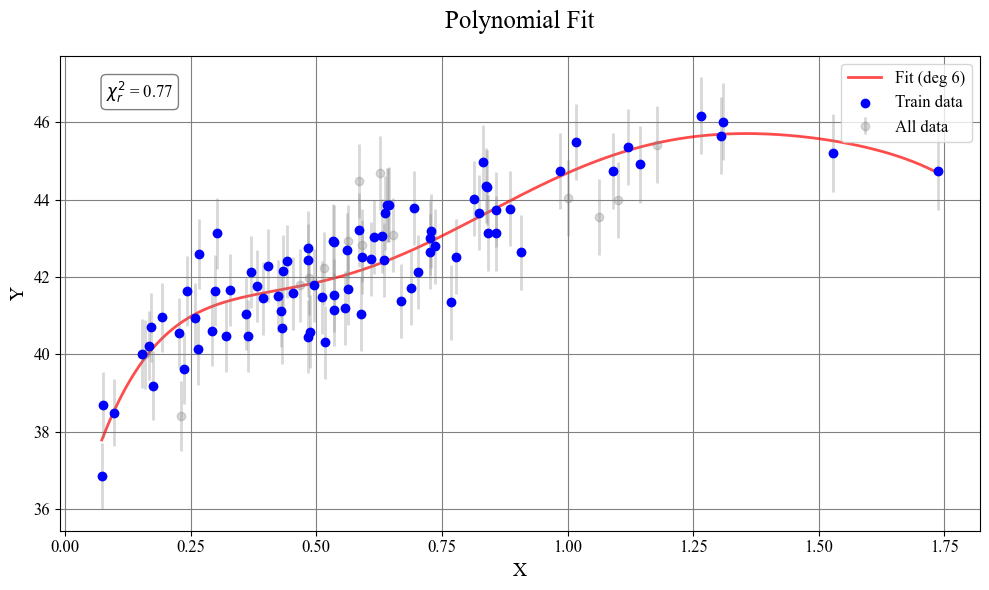

(array([  34.55343788,   55.66979765, -179.2267383 ,  290.16786828,
        -234.67154069,   92.49891436,  -14.30388711]),
 array([[ 2.04738719e+00, -2.59767758e+01,  1.11251151e+02,
         -2.18488284e+02,  2.14816059e+02, -1.02598076e+02,
          1.89077175e+01],
        [-2.59767758e+01,  3.61589510e+02, -1.63133537e+03,
          3.31326746e+03, -3.33482741e+03,  1.62030043e+03,
         -3.02497790e+02],
        [ 1.11251151e+02, -1.63133537e+03,  7.63623165e+03,
         -1.59322389e+04,  1.63640662e+04, -8.07571510e+03,
          1.52613552e+03],
        [-2.18488284e+02,  3.31326746e+03, -1.59322389e+04,
          3.39551449e+04, -3.54701380e+04,  1.77426039e+04,
         -3.38944863e+03],
        [ 2.14816059e+02, -3.33482741e+03,  1.63640662e+04,
         -3.54701380e+04,  3.75762347e+04, -1.90144332e+04,
          3.66690738e+03],
        [-1.02598076e+02,  1.62030043e+03, -8.07571510e+03,
          1.77426039e+04, -1.90144332e+04,  9.71576827e+03,
         -1.88889718e+

In [7]:
fitter.train(True)

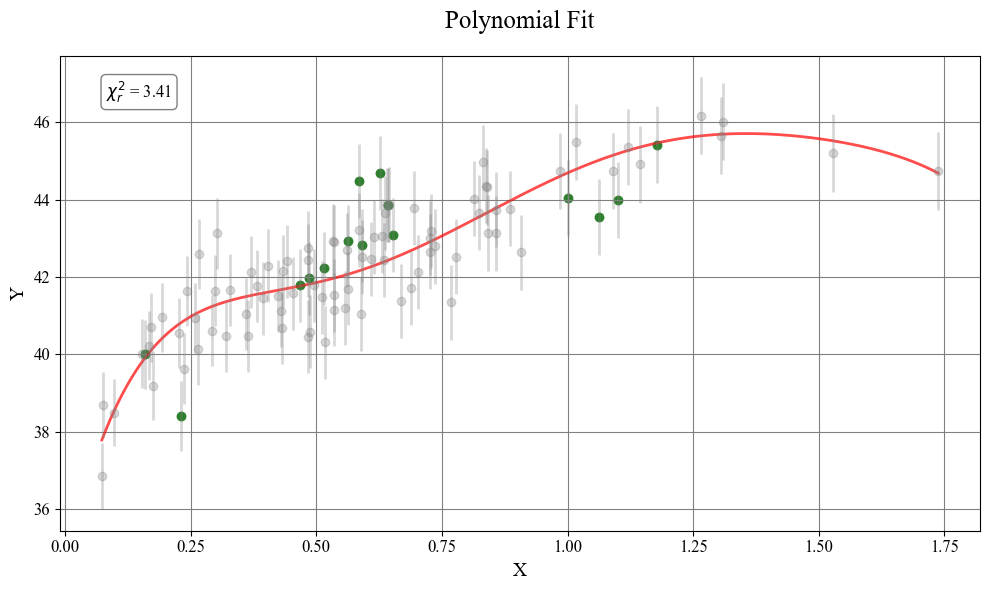

(array([  34.55343788,   55.66979765, -179.2267383 ,  290.16786828,
        -234.67154069,   92.49891436,  -14.30388711]),
 array([[ 3.93298063e+02, -5.30055160e+03,  2.64274485e+04,
         -6.39396956e+04,  8.04904237e+04, -5.05700334e+04,
          1.25061650e+04],
        [-5.30055159e+03,  7.28934025e+04, -3.70693465e+05,
          9.12118553e+05, -1.16428974e+06,  7.39781276e+05,
         -1.84621269e+05],
        [ 2.64274484e+04, -3.70693465e+05,  1.92404211e+06,
         -4.81818225e+06,  6.24009930e+06, -4.01167903e+06,
          1.01064234e+06],
        [-6.39396955e+04,  9.12118552e+05, -4.81818225e+06,
          1.22509778e+07, -1.60687666e+07,  1.04372770e+07,
         -2.65131185e+06],
        [ 8.04904235e+04, -1.16428973e+06,  6.24009929e+06,
         -1.60687666e+07,  2.13012979e+07, -1.39564450e+07,
          3.57019083e+06],
        [-5.05700333e+04,  7.39781274e+05, -4.01167902e+06,
          1.04372770e+07, -1.39564450e+07,  9.20927079e+06,
         -2.36940345e+

In [8]:
fitter.test(True)

In [9]:
RMS = fitter.k_fold_cross_validation()

In [10]:
RMS

(np.float64(0.8584864937288901), np.float64(1.330621848624741))

In [11]:
train, val = [], []
for i in range(16):
    mean_train, mean_val = fitter.k_fold_cross_validation()
    train.append(mean_train)    
    val.append(mean_val)

In [12]:
import matplotlib.pyplot as plt

In [13]:
degs = range(16)

Text(0.5, 1.0, 'Validation')

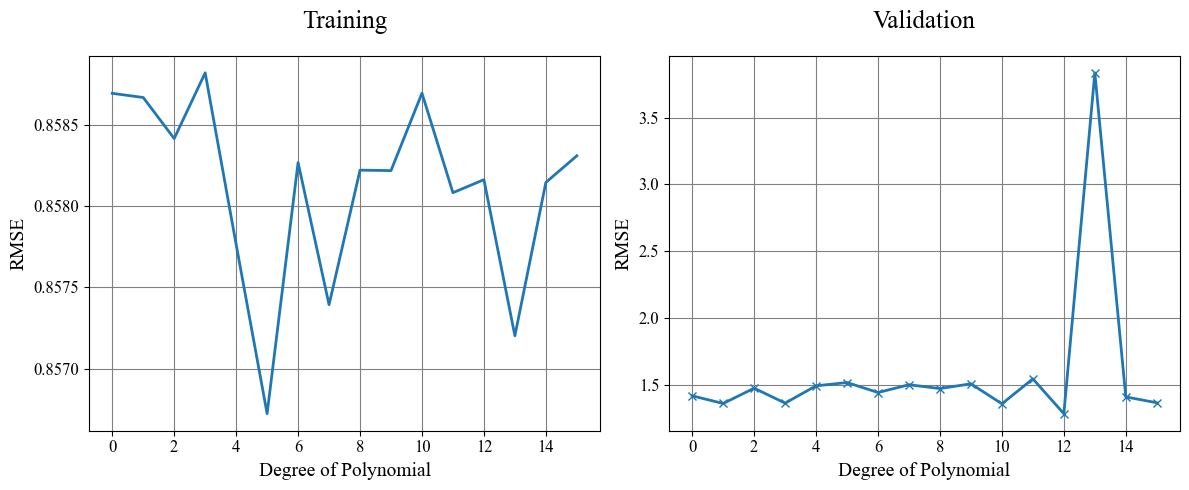

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplot(121)
plt.plot(degs, train, label="Train")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title('Training')

plt.subplot(122)
plt.plot(degs, val, marker='x', label="Validation")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title('Validation')